***Webscraper Hotels Data - 123 Milhas / Decolar***

*   Data extraction name, price and provider hotels website 123 Milhas
*   Data extraction name and price hotels website Decolar
*   Report rate comparison

In [1]:
!pip install selenium
!pip install unidecode
!pip install pyjarowinkler
!apt-get update 
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import *
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from unidecode import unidecode
from time import sleep
import pandas as pd
import os

In [3]:
# ID destinations

# 123 Milhas
  # Aracaju: 1010804
  # Arraial dAjuda: 1184784
  # Balneario Camboriu: 1013062
  # Belo Horizonte: 1017081
  # Brasilia: 1262440
  # Buzios: 1156720
  # Cabo Frio: 1027418
  # Caldas Novas: 1027035
  # Campinas: 1265185
  # Campos do Jordao: 1621906
  # Canela: 1006401
  # Curitiba: 1112002
  # Florianopolis: 1001872
  # Fortaleza: 1001925
  # Foz do Iguacu: 1106867
  # Gramado: 1006404
  # Ilhabela: 1012575
  # Ilheus: 1002846
  # Joao Pessoa: 1111236
  # Maceio: 1009657
  # Morro de Sao Paulo: 1060292
  # Natal: 1009933
  # Porto Alegre: 1112012
  # Porto de Galinhas: 1024069
  # Porto Seguro: 1262144
  # Praia de Pipa: 1060267
  # Recife: 1010394
  # Rio de Janeiro: 1010422
  # Salvador: 1010693
  # Sao Paulo: 1010502

# Decolar
  # Aracaju: 180
  # Arraial dAjuda: 339
  # Balneario Camboriu: 192594
  # Belo Horizonte: 701
  # Brasilia: 926
  # Buzios: 1077
  # Cabo Frio: 1227
  # Caldas Novas: 1364
  # Campinas: 1467
  # Campos do Jordao: 6116
  # Canela: 6064
  # Curitiba: 1595
  # Florianopolis: 2261
  # Fortaleza: 2302
  # Foz do Iguacu: 3072
  # Gramado: 2611
  # Ilhabela: 3027
  # Ilheus: 3158
  # Joao Pessoa: 3399
  # Maceio: 4430
  # Morro de Sao Paulo: 4678
  # Natal: 4971
  # Porto Alegre: 5822
  # Porto de Galinhas: 5648
  # Porto Seguro: 881
  # Praia de Pipa: 5875
  # Recife: 6322
  # Rio de Janeiro: 6381
  # Salvador: 7018
  # Sao Paulo: 6574

In [4]:
# Search params

name_destination = 'Maceio'
id_destination_123milhas = '1009657'
id_destination_decolar = '4430'
checkin = '10-03-2022' # Format DD-MM-AAAA
checkout = '12-03-2022' # Format DD-MM-AAAA
pax = 2 # Number of guests (adults)

In [5]:
# Chromedriver config

chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
chrome_options.add_argument('--lang=pt-BR')
chrome_options.add_argument('--disable-notifications')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [6]:
# Get fee 123 Milhas

def get_fee():
    driver = webdriver.Chrome(options=chrome_options)
    link = f'https://123milhas.com/hoteis?adultos={pax}&bebes=0&checkin={checkin}&checkout={checkout}&criancas=0&id={id_destination_123milhas}&localizacao={name_destination},%20,%20Brasil&quartos={pax}&tipo=City&search_id='
    driver.get(link)
    sleep(3)
       
    price_net_temp = []
    tax_temp = []

    wait = WebDriverWait(driver, 10)

    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'image-slider__main-image')))        
    hotel1_attributes = driver.find_element(By.XPATH, '/html/body/div[1]/div/hotel-card-price-list-and-filter-wrapper/div/div[3]/div[1]/hotel-list-card[1]/div[2]/div[3]/div[4]/theme-button/button').get_attribute('outerHTML')
    attributes_filter1 = ''.join(hotel1_attributes.partition('id')[1:])
    attributes_filter2 = attributes_filter1.find('type')
    attributes_filter3 = attributes_filter1[:attributes_filter2]
    attributes_replacers = attributes_filter3.replace('"','').replace('=','-').replace(' ','').replace('id-','')
    query = "'#" + attributes_replacers + "'"
    
    driver.execute_script(f"document.querySelector({query}).click();")
    new_window = driver.window_handles[1]
    driver.switch_to.window(new_window)
    
    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'rooms-details-and-price__button')))
    driver.execute_script("document.querySelector('#hotel-details-and-info > div > rooms-details-and-price > div > div.rooms-details-and-price__prices-select-holder > theme-button > button').click();")
    
    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'hotel-checkout-prices-and-tax')))        
    price_net_elem = driver.find_element(By.XPATH, '//*[@id="checkout-form"]/div/div[2]/div[1]/hotel-checkout-prices-and-tax/div/div[2]/span[2]')
    tax_elem = driver.find_element(By.XPATH, '//*[@id="checkout-form"]/div/div[2]/div[1]/hotel-checkout-prices-and-tax/div/div[3]/span[2]')

    price_net_temp.append(price_net_elem.text)
    tax_temp.append(tax_elem.text)
    price_net = rate_fmt(price_net_temp)
    tax = rate_fmt(tax_temp)
    
    global fee
    calc_fee = tax / price_net
    fee = float("%.4f" % calc_fee)
    return fee


def rate_fmt(rate):
    rate = ' '.join(rate)
    rate = rate.strip('R$').lstrip().replace(',','.')
    rate = float(rate)
    return rate



In [7]:
print('Fee 123 Milhas:')
get_fee()

Fee 123 Milhas:


0.1446

In [8]:
# Scraper Hotel Prices 123 Milhas

list_name_hotels_123milhas = []
list_price_hotels_123milhas = []
list_channel_hotels_123milhas = []

class Scraper123milhas:

    def scraper(self):
        self.data_collect()

    def data_collect(self):
        self.list_names = []
        self.list_prices = []
        self.list_channels = []
        self.driver = webdriver.Chrome(options=chrome_options)
        self.link = f'https://123milhas.com/hoteis?adultos={pax}&bebes=0&checkin={checkin}&checkout={checkout}&criancas=0&id={id_destination_123milhas}&localizacao={name_destination},%20,%20Brasil&quartos={pax}&tipo=City&search_id='
        self.driver.get(self.link)
        sleep(3)
        wait = WebDriverWait(self.driver, 10)

        for p in range(20): # Number of pages to browse (nº > total, run through all)
            item = 1
            wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'hotel-list-card__total-price')))
            list_length = self.driver.find_elements(By.CLASS_NAME, 'hotel-list-card__total-price')
            list_max = len(list_length)
            for i in range(list_max):
                c = 1
                while c < list_max:
                    try:
                        names_temp = self.driver.find_elements(By.XPATH,
                            f'//*[@id="hotelListHolder"]/div[3]/div[1]/hotel-list-card[{item}]/div[2]/div[1]/div/h4')
                        self.list_names.append(names_temp[0].text)                       
                        sleep(1)
                        prices_temp = self.driver.find_elements(By.XPATH,
                            f'//*[@id="hotelListHolder"]/div[3]/div[1]/hotel-list-card[{item}]/div[2]/div[2]/div[1]/div/div')
                        self.list_prices.append(prices_temp[0].text)          
                        sleep(1)
                        channels_temp = self.driver.find_element(By.XPATH,
                            f'/html/body/div[1]/div/hotel-card-price-list-and-filter-wrapper/div/div[3]/div[1]/hotel-list-card[{item}]/div[2]/div[1]/image-slider/div/div[1]/img').get_attribute('outerHTML')
                        if len(channels_temp) == 0:
                            channels_temp = self.driver.find_element(By.XPATH, f'/html/body/div[1]/div/hotel-card-price-list-and-filter-wrapper/div/div[3]/div[1]/hotel-list-card[{item}]/div[2]/div[2]/image-slider/div/div[1]/img').get_attribute('outerHTML')                        
                        if 'omnibees' in channels_temp:
                            self.list_channels.append(1)
                        else:
                            self.list_channels.append(0)
                        sleep(1)
                        item += 1
                    except:
                        item += 1
                        c += 1                        
            try:
              wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'pagination-next')))
              self.driver.execute_script('document.querySelectorAll("#hotelListHolder > div.hotel-card-price-list__cards-holder.hotel-card-price-list__obj-align > div.hotel-card-price-list__pagination-container > ul > li.pagination-next > a")[0].click();')
              print(f'\u001b[32m{"Browsing..."}\u001b[0m')
              sleep(3)
            except:
              self.driver.quit()

        print('Raw Data:')
        print(self.list_names)
        print(self.list_prices)
        print(self.list_channels)

        for name in self.list_names:
            list_name_hotels_123milhas.append(name)
        for price in self.list_prices:
            list_price_hotels_123milhas.append(price)  
        for channel in self.list_channels:
            list_channel_hotels_123milhas.append(channel)

start = Scraper123milhas()
start.scraper()


Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Raw Data:
['Ritz Lagoa da Anta', 'Hotel Ritz Plazamar', 'Hotel Brisa Tower Maceió', 'Hotel Costamar', 'Hotel Brisa Praia Maceió', 'Hotel Praia Bonita Jatiúca', 'Hotel Praia Bonita Jatiúca', 'Cais da Praia Hotel', 'Soft Inn Maceió Ponta Verde', 'Hotel Intercity Maceió', 'Villas Supreme Hotel', 'Matsubara Acqua Park Hotel', 'Ritz Suítes Home Service', 'Holiday Inn Express Maceió Ponta Verde', 'PORTO KAETE HOTEL', 'Reymar Express', 'Água de Coco Pousada', 'Pajuçara Praia Hotel', 'San Marino Suíte Hotel Maceio', 'Jatiúca Suites Resort by Slaviero Hotéis', 'Hotel Porto Maceio', 'Hotel Porto Maceió', 'Hotel Ciribaí Maceió', 'Hotel Água de Coco', 'Amenit Hotel', 'CONDE HOTEL', 'Praia Hotel Enseada', 'POUSADA NOSSA CASA', 'Zuza Slim Suítes', 'Hotel Ritz Cora

In [9]:
# Data cleaning

name_hotels_123m_temp = list(pd.Series(list_name_hotels_123milhas).str.upper())
name_hotels_123m_fmtg = []

for name in name_hotels_123m_temp:
    name_hotels_123m_fmtg.append(unidecode(name))
print(name_hotels_123m_fmtg)

['RITZ LAGOA DA ANTA', 'HOTEL RITZ PLAZAMAR', 'HOTEL BRISA TOWER MACEIO', 'HOTEL COSTAMAR', 'HOTEL BRISA PRAIA MACEIO', 'HOTEL PRAIA BONITA JATIUCA', 'HOTEL PRAIA BONITA JATIUCA', 'CAIS DA PRAIA HOTEL', 'SOFT INN MACEIO PONTA VERDE', 'HOTEL INTERCITY MACEIO', 'VILLAS SUPREME HOTEL', 'MATSUBARA ACQUA PARK HOTEL', 'RITZ SUITES HOME SERVICE', 'HOLIDAY INN EXPRESS MACEIO PONTA VERDE', 'PORTO KAETE HOTEL', 'REYMAR EXPRESS', 'AGUA DE COCO POUSADA', 'PAJUCARA PRAIA HOTEL', 'SAN MARINO SUITE HOTEL MACEIO', 'JATIUCA SUITES RESORT BY SLAVIERO HOTEIS', 'HOTEL PORTO MACEIO', 'HOTEL PORTO MACEIO', 'HOTEL CIRIBAI MACEIO', 'HOTEL AGUA DE COCO', 'AMENIT HOTEL', 'CONDE HOTEL', 'PRAIA HOTEL ENSEADA', 'POUSADA NOSSA CASA', 'ZUZA SLIM SUITES', 'HOTEL RITZ CORALLI', 'EXPRESSO R1 HOTEL', 'VISTAMAR HOTEL', 'POUSADA MAR DE MACEIO', 'HOTEL POUSADA DA SEREIA', 'POUSADA ECOMACEIO', 'HOTEL DES BASQUES', "HOTEL D'ANATUREZA", 'ARAM OURO BRANCO HOTEL', 'POUSADA PEROLA DOURADA', 'BEST WESTERN PREMIER MACEIO', 'IBIS M

In [10]:
price_hotels_123m_fmtg = []

for price in list_price_hotels_123milhas:
    for dot in ["."]:
        price = price.replace(dot, "")
    price_hotels_123m_fmtg.append(price)
print(price_hotels_123m_fmtg)

['R$ 1246', 'R$ 525', 'R$ 677', 'R$ 579', 'R$ 684', 'R$ 550', 'R$ 552', 'R$ 518', 'R$ 397', 'R$ 477', 'R$ 464', 'R$ 379', 'R$ 875', 'R$ 553', 'R$ 589', 'R$ 370', 'R$ 541', 'R$ 588', 'R$ 467', 'R$ 823', 'R$ 446', 'R$ 423', 'R$ 448', 'R$ 635', 'R$ 346', 'R$ 260', 'R$ 337', 'R$ 219', 'R$ 287', 'R$ 597', 'R$ 235', 'R$ 902', 'R$ 284', 'R$ 404', 'R$ 359', 'R$ 287', 'R$ 376', 'R$ 373', 'R$ 513', 'R$ 750', 'R$ 341', 'R$ 383', 'R$ 273', 'R$ 389', 'R$ 383', 'R$ 481', 'R$ 495', 'R$ 263', 'R$ 619', 'R$ 624', 'R$ 625', 'R$ 684', 'R$ 623', 'R$ 639', 'R$ 495', 'R$ 255', 'R$ 330', 'R$ 339', 'R$ 354', 'R$ 379', 'R$ 409', 'R$ 434', 'R$ 478', 'R$ 495', 'R$ 605', 'R$ 304', 'R$ 355', 'R$ 314', 'R$ 619', 'R$ 624', 'R$ 625', 'R$ 684', 'R$ 623', 'R$ 639', 'R$ 495', 'R$ 255', 'R$ 330', 'R$ 339', 'R$ 354', 'R$ 379', 'R$ 409', 'R$ 434', 'R$ 478', 'R$ 495', 'R$ 605', 'R$ 304', 'R$ 355', 'R$ 314', 'R$ 619', 'R$ 624', 'R$ 625', 'R$ 684', 'R$ 623', 'R$ 639', 'R$ 495', 'R$ 255', 'R$ 330', 'R$ 339', 'R$ 354', 'R$ 379'

In [11]:
price_hotels_123m_fmtg2 = []

for price in price_hotels_123m_fmtg:
    for sign in ["R$ "]:
        price = price.replace(sign, "")
    price_hotels_123m_fmtg2.append(price)
print(price_hotels_123m_fmtg2)

['1246', '525', '677', '579', '684', '550', '552', '518', '397', '477', '464', '379', '875', '553', '589', '370', '541', '588', '467', '823', '446', '423', '448', '635', '346', '260', '337', '219', '287', '597', '235', '902', '284', '404', '359', '287', '376', '373', '513', '750', '341', '383', '273', '389', '383', '481', '495', '263', '619', '624', '625', '684', '623', '639', '495', '255', '330', '339', '354', '379', '409', '434', '478', '495', '605', '304', '355', '314', '619', '624', '625', '684', '623', '639', '495', '255', '330', '339', '354', '379', '409', '434', '478', '495', '605', '304', '355', '314', '619', '624', '625', '684', '623', '639', '495', '255', '330', '339', '354', '379', '409', '434', '478', '495', '605', '304', '355', '314', '619', '624', '625', '684', '623', '639', '495', '255', '330', '339', '354', '379', '409', '434', '478', '495', '605', '304', '355', '314', '619', '624', '625', '684', '623', '639', '495', '255', '330', '339', '354', '379', '409', '434', '478

In [12]:
price_hotels_123m_fmtg2 = pd.to_numeric(price_hotels_123m_fmtg2, errors='coerce', downcast='unsigned')

In [13]:
data_hotels_123m = []

for elems in zip(name_hotels_123m_fmtg, price_hotels_123m_fmtg2):
    data_hotels_123m.append(elems)
data_hotels_123m_dict = dict(data_hotels_123m)
print(data_hotels_123m_dict)

{'RITZ LAGOA DA ANTA': 1246, 'HOTEL RITZ PLAZAMAR': 525, 'HOTEL BRISA TOWER MACEIO': 677, 'HOTEL COSTAMAR': 579, 'HOTEL BRISA PRAIA MACEIO': 684, 'HOTEL PRAIA BONITA JATIUCA': 552, 'CAIS DA PRAIA HOTEL': 518, 'SOFT INN MACEIO PONTA VERDE': 397, 'HOTEL INTERCITY MACEIO': 477, 'VILLAS SUPREME HOTEL': 464, 'MATSUBARA ACQUA PARK HOTEL': 379, 'RITZ SUITES HOME SERVICE': 875, 'HOLIDAY INN EXPRESS MACEIO PONTA VERDE': 553, 'PORTO KAETE HOTEL': 589, 'REYMAR EXPRESS': 370, 'AGUA DE COCO POUSADA': 541, 'PAJUCARA PRAIA HOTEL': 588, 'SAN MARINO SUITE HOTEL MACEIO': 467, 'JATIUCA SUITES RESORT BY SLAVIERO HOTEIS': 823, 'HOTEL PORTO MACEIO': 423, 'HOTEL CIRIBAI MACEIO': 448, 'HOTEL AGUA DE COCO': 635, 'AMENIT HOTEL': 346, 'CONDE HOTEL': 260, 'PRAIA HOTEL ENSEADA': 337, 'POUSADA NOSSA CASA': 219, 'ZUZA SLIM SUITES': 287, 'HOTEL RITZ CORALLI': 597, 'EXPRESSO R1 HOTEL': 235, 'VISTAMAR HOTEL': 902, 'POUSADA MAR DE MACEIO': 284, 'HOTEL POUSADA DA SEREIA': 404, 'POUSADA ECOMACEIO': 359, 'HOTEL DES BASQUES

In [14]:
df_data_hotels_123m = pd.DataFrame(list(data_hotels_123m_dict.items()),
                   columns=['Hotel Name', 'Net Price 123 Milhas'])
display(df_data_hotels_123m)

,Hotel Name,Net Price 123 Milhas
0,RITZ LAGOA DA ANTA,1246
1,HOTEL RITZ PLAZAMAR,525
2,HOTEL BRISA TOWER MACEIO,677
3,HOTEL COSTAMAR,579
4,HOTEL BRISA PRAIA MACEIO,684
...,...,...
61,PALMS PONTA VERDE BY TROPICALIS,495
62,VERANO TROPICALIS HOTEL,605
63,POUSADA PRAIA DE PAJUCARA,304
64,LAGOA MAR,355


In [15]:
df_data_hotels_123m['Total Price 123 Milhas (w/ fee)'] = (df_data_hotels_123m['Net Price 123 Milhas'] * fee) + df_data_hotels_123m['Net Price 123 Milhas'].apply(pd.to_numeric) 

In [16]:
df_data_hotels_123m['Total Price 123 Milhas (w/ fee)'] = df_data_hotels_123m['Total Price 123 Milhas (w/ fee)'].astype(int)

In [17]:
df_data_hotels_123m

,Hotel Name,Net Price 123 Milhas,Total Price 123 Milhas (w/ fee)
0,RITZ LAGOA DA ANTA,1246,1426
1,HOTEL RITZ PLAZAMAR,525,600
2,HOTEL BRISA TOWER MACEIO,677,774
3,HOTEL COSTAMAR,579,662
4,HOTEL BRISA PRAIA MACEIO,684,782
...,...,...,...
61,PALMS PONTA VERDE BY TROPICALIS,495,566
62,VERANO TROPICALIS HOTEL,605,692
63,POUSADA PRAIA DE PAJUCARA,304,347
64,LAGOA MAR,355,406


In [18]:
length_df1 = len(df_data_hotels_123m)
length_df2 = len(list_channel_hotels_123milhas)
diff_length_dfs = length_df2 - length_df1
list_channel_hotels_123milhas = list_channel_hotels_123milhas[:length_df2 - diff_length_dfs]

In [19]:
df_data_hotels_123m.insert(loc=1, column='Omnibees Provider 123 Milhas', value=list_channel_hotels_123milhas)

In [20]:
df_data_hotels_123m

,Hotel Name,Omnibees Provider 123 Milhas,Net Price 123 Milhas,Total Price 123 Milhas (w/ fee)
0,RITZ LAGOA DA ANTA,0,1246,1426
1,HOTEL RITZ PLAZAMAR,0,525,600
2,HOTEL BRISA TOWER MACEIO,0,677,774
3,HOTEL COSTAMAR,0,579,662
4,HOTEL BRISA PRAIA MACEIO,0,684,782
...,...,...,...,...
61,PALMS PONTA VERDE BY TROPICALIS,0,495,566
62,VERANO TROPICALIS HOTEL,0,605,692
63,POUSADA PRAIA DE PAJUCARA,0,304,347
64,LAGOA MAR,0,355,406


In [21]:
copy_df_123m = df_data_hotels_123m.copy()

In [22]:
from datetime import datetime

checkin_decolar = datetime.strptime(checkin, "%d-%m-%Y").strftime('%Y-%m-%d')
checkout_decolar = datetime.strptime(checkout, "%d-%m-%Y").strftime('%Y-%m-%d')

In [23]:
# Scraper Hotel Prices Decolar

list_name_hotels_decolar = []
list_price_hotels_decolar = []

class ScraperDecolar:

    def scraper(self):
        self.data_collect()

    def data_collect(self): 
        page = 1      
        self.driver = webdriver.Chrome(options=chrome_options)
        self.link = f'https://www.decolar.com/accommodations/results/CIT_{id_destination_decolar}/{checkin_decolar}/{checkout_decolar}/{pax}?from=SB2&facet=city&searchId=2c403941-a9b6-457f-a17e-5f3131886e89&page={page}'
        self.list_names = []
        self.list_prices = []
        self.driver.get(self.link)
        self.driver.find_element(By.XPATH, '//*[@id="lgpd-banner"]/div/a[2]').click()
        sleep(3)
        
        for p in range(20): # Number of pages to browse (nº > total, run through all)
            item = 1
            list_length = self.driver.find_elements(By.CLASS_NAME, 'accommodation-name')
            list_max = len(list_length)
            for i in range(list_max):
                c = 1
                while c < list_max:
                    try:
                        names_temp = self.driver.find_elements(By.XPATH,
                            f'/html/body/aloha-app-root/aloha-results/div/div/div/div/div[2]/aloha-list-view-container/div[2]/div[{item}]/aloha-cluster-container/div/div/div[1]/div/div[2]/div/aloha-cluster-accommodation-info-container/div[1]/span')
                        self.list_names.append(names_temp[0].text)
                        sleep(1)
                        prices_temp = self.driver.find_elements(By.XPATH,
                            f'/html/body/aloha-app-root/aloha-results/div/div/div/div/div[2]/aloha-list-view-container/div[2]/div[{item}]/aloha-cluster-container/div/div/div[2]/aloha-cluster-pricebox-container/div/div[2]/div[1]/aloha-price-container/aloha-summary-price/div/span[2]')
                        self.list_prices.append(prices_temp[0].text)          
                        sleep(1)
                        item += 1
                    except:
                        item += 1
                        c += 1                        
            try:
                page += 1
                self.driver.get(f'https://www.decolar.com/accommodations/results/CIT_{id_destination_decolar}/{checkin_decolar}/{checkout_decolar}/{pax}?from=SB2&facet=city&searchId=2c403941-a9b6-457f-a17e-5f3131886e89&page={page}')
                print(f'\u001b[32m{"Browsing..."}\u001b[0m')
                sleep(5)
            except:
                self.driver.quit()
        
        print("Raw data:")
        print(self.list_names)
        print(self.list_prices)

        for name in self.list_names:
            list_name_hotels_decolar.append(name)
        for price in self.list_prices:
            list_price_hotels_decolar.append(price)


start = ScraperDecolar()
start.scraper()


Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Browsing...
Raw data:
['Hotel Brisa Suites', 'Hotel Ponta Verde Maceió', 'Hotel Brisa Praia', 'Hotel Brisa Tower', 'Reymar Express', 'Ritz Lagoa Da Anta', 'Ritz Suites Home Service', 'Comfort Hotel Maceió', 'San Marino Suíte Hotel', 'Tambaqui Praia Hotel', 'Maceió Mar Hotel', 'Slim Pajuçara by Tropicalis', 'Palms Ponta Verde by Tropicalis', 'Best Western Premier Maceió', 'Jatiúca Suítes Resort by Slaviero Hotéis', 'Amenit Hotel', 'Pajuçara Praia Hotel', 'Porto Kaeté', 'Intercity Maceió', 'Hotel Palmanova', 'Mercure Maceió Pajuçara', 'Verano Pajuçara by Tropicalis', 'Praia Hotel Enseada', 'Matsubara Acqua Park Hotel', 'Pousada EcoMaceió', 'Laguna Praia Hotel', 'Hotel Praia Bonita Jatiúca', 'Hotel Costamar', 'Soft Inn Maceió Ponta Verde', 'Hotel Ciribaí', 'Pousada

In [24]:
# Data cleaning

name_hotels_desp_temp = list(pd.Series(list_name_hotels_decolar).str.upper())
name_hotels_desp_fmtg = []

for name in name_hotels_desp_temp:
    name_hotels_desp_fmtg.append(unidecode(name))
print(name_hotels_desp_fmtg)

['HOTEL BRISA SUITES', 'HOTEL PONTA VERDE MACEIO', 'HOTEL BRISA PRAIA', 'HOTEL BRISA TOWER', 'REYMAR EXPRESS', 'RITZ LAGOA DA ANTA', 'RITZ SUITES HOME SERVICE', 'COMFORT HOTEL MACEIO', 'SAN MARINO SUITE HOTEL', 'TAMBAQUI PRAIA HOTEL', 'MACEIO MAR HOTEL', 'SLIM PAJUCARA BY TROPICALIS', 'PALMS PONTA VERDE BY TROPICALIS', 'BEST WESTERN PREMIER MACEIO', 'JATIUCA SUITES RESORT BY SLAVIERO HOTEIS', 'AMENIT HOTEL', 'PAJUCARA PRAIA HOTEL', 'PORTO KAETE', 'INTERCITY MACEIO', 'HOTEL PALMANOVA', 'MERCURE MACEIO PAJUCARA', 'VERANO PAJUCARA BY TROPICALIS', 'PRAIA HOTEL ENSEADA', 'MATSUBARA ACQUA PARK HOTEL', 'POUSADA ECOMACEIO', 'LAGUNA PRAIA HOTEL', 'HOTEL PRAIA BONITA JATIUCA', 'HOTEL COSTAMAR', 'SOFT INN MACEIO PONTA VERDE', 'HOTEL CIRIBAI', 'POUSADA NOSSA CASA - MACEIO', 'POUSADA PRAIA PAJUCARA', 'ZUZA SLIM SUITES', 'CAIS DA PRAIA HOTEL', 'CONDE HOTEL', 'HOTEL POUSADA DA SEREIA', "D'ANATUREZA HOTEL", 'HOTEL PORTO MACEIO', 'RITZ CORALLI HOTEL BOUTIQUE', 'IBIS BUDGET MACEIO PAJUCARA', 'POUSADA PE

In [25]:
price_hotels_desp_fmtg = []

for price in list_price_hotels_decolar:
    for dot in ["."]:
        price = price.replace(dot, "")
    price_hotels_desp_fmtg.append(price)
print(price_hotels_desp_fmtg)

['1028', '976', '1028', '1018', '548', '1788', '1252', '714', '760', '868', '1066', '820', '640', '1442', '1220', '478', '758', '806', '706', '476', '778', '776', '454', '558', '484', '428', '738', '832', '590', '564', '256', '362', '350', '610', '398', '544', '602', '552', '720', '354', '742', '504', '454', '786', '842', '402', '632', '636', '544', '242', '450', '286', '482', '502', '376', '706', '826', '570', '526', '556', '324', '642', '570', '574', '602', '282', '636', '722', '606', '408', '632', '578', '554', '636', '698', '552', '570', '474', '554', '720', '720', '632', '468', '474', '570', '720', '594', '720', '372', '750', '1162', '730', '578', '684', '782', '726', '702', '632', '712', '2424', '1188', '486', '486', '600', '486', '520', '618', '678', '600', '600', '904', '486', '600', '1130', '668', '1142', '496', '782', '826', '712', '562', '676', '452', '668', '4476', '360', '4610', '600', '564', '496', '2148', '486', '206', '338', '904']


In [26]:
price_hotels_desp_fmtg = pd.to_numeric(price_hotels_desp_fmtg, errors='coerce')

In [27]:
data_hotels_desp = []

for elems in zip(name_hotels_desp_fmtg, price_hotels_desp_fmtg):
    data_hotels_desp.append(elems)
data_hotels_desp_dict = dict(data_hotels_desp)
print(data_hotels_desp_dict)

{'HOTEL BRISA SUITES': 1028, 'HOTEL PONTA VERDE MACEIO': 976, 'HOTEL BRISA PRAIA': 1028, 'HOTEL BRISA TOWER': 1018, 'REYMAR EXPRESS': 548, 'RITZ LAGOA DA ANTA': 1788, 'RITZ SUITES HOME SERVICE': 1252, 'COMFORT HOTEL MACEIO': 714, 'SAN MARINO SUITE HOTEL': 760, 'TAMBAQUI PRAIA HOTEL': 868, 'MACEIO MAR HOTEL': 1066, 'SLIM PAJUCARA BY TROPICALIS': 820, 'PALMS PONTA VERDE BY TROPICALIS': 640, 'BEST WESTERN PREMIER MACEIO': 1442, 'JATIUCA SUITES RESORT BY SLAVIERO HOTEIS': 1220, 'AMENIT HOTEL': 478, 'PAJUCARA PRAIA HOTEL': 758, 'PORTO KAETE': 806, 'INTERCITY MACEIO': 706, 'HOTEL PALMANOVA': 476, 'MERCURE MACEIO PAJUCARA': 778, 'VERANO PAJUCARA BY TROPICALIS': 776, 'PRAIA HOTEL ENSEADA': 454, 'MATSUBARA ACQUA PARK HOTEL': 558, 'POUSADA ECOMACEIO': 484, 'LAGUNA PRAIA HOTEL': 428, 'HOTEL PRAIA BONITA JATIUCA': 738, 'HOTEL COSTAMAR': 832, 'SOFT INN MACEIO PONTA VERDE': 590, 'HOTEL CIRIBAI': 564, 'POUSADA NOSSA CASA - MACEIO': 256, 'POUSADA PRAIA PAJUCARA': 362, 'ZUZA SLIM SUITES': 350, 'CAIS DA

In [28]:
df_data_hotels_desp = pd.DataFrame(list(data_hotels_desp_dict.items()),
                   columns=['Hotel Name', 'Total Price Decolar'])
display(df_data_hotels_desp)

,Hotel Name,Total Price Decolar
0,HOTEL BRISA SUITES,1028
1,HOTEL PONTA VERDE MACEIO,976
2,HOTEL BRISA PRAIA,1028
3,HOTEL BRISA TOWER,1018
4,REYMAR EXPRESS,548
...,...,...
130,HOUSE IN MACIEO ON THE BEACH OF IPIOCA HIBISCU...,2148
131,VACANZE - WALES OF PAJUCARA - APT. 204,486
132,SUITE ESTILOSA DA DAI,206
133,B&B ALUGUEIS SUITE,338


In [29]:
copy_df_desp = df_data_hotels_desp.copy()

In [30]:
# Data merge

data_merge = pd.merge(df_data_hotels_123m, df_data_hotels_desp, on=['Hotel Name'], how='left')
display(data_merge)

,Hotel Name,Omnibees Provider 123 Milhas,Net Price 123 Milhas,Total Price 123 Milhas (w/ fee),Total Price Decolar
0,RITZ LAGOA DA ANTA,0,1246,1426,1788.0
1,HOTEL RITZ PLAZAMAR,0,525,600,NaN
2,HOTEL BRISA TOWER MACEIO,0,677,774,NaN
3,HOTEL COSTAMAR,0,579,662,832.0
4,HOTEL BRISA PRAIA MACEIO,0,684,782,NaN
...,...,...,...,...,...
61,PALMS PONTA VERDE BY TROPICALIS,0,495,566,640.0
62,VERANO TROPICALIS HOTEL,0,605,692,NaN
63,POUSADA PRAIA DE PAJUCARA,0,304,347,NaN
64,LAGOA MAR,0,355,406,NaN


In [31]:
df_rate_comparison = data_merge.dropna()
df_rate_comparison.shape

(35, 5)

In [32]:
pd.options.mode.chained_assignment = None

for prices in df_rate_comparison:
    diff = (df_rate_comparison.loc[:, 'Total Price Decolar'] / df_rate_comparison.loc[:, 'Total Price 123 Milhas (w/ fee)'] -1 ) * 100
    df_rate_comparison.loc[:, '% Variation (total prices)'] = round(diff)
display(df_rate_comparison)

,Hotel Name,Omnibees Provider 123 Milhas,Net Price 123 Milhas,Total Price 123 Milhas (w/ fee),Total Price Decolar,% Variation (total prices)
0,RITZ LAGOA DA ANTA,0,1246,1426,1788.0,25.0
3,HOTEL COSTAMAR,0,579,662,832.0,26.0
5,HOTEL PRAIA BONITA JATIUCA,0,552,631,738.0,17.0
6,CAIS DA PRAIA HOTEL,0,518,592,610.0,3.0
7,SOFT INN MACEIO PONTA VERDE,0,397,454,590.0,30.0
10,MATSUBARA ACQUA PARK HOTEL,0,379,433,558.0,29.0
11,RITZ SUITES HOME SERVICE,0,875,1001,1252.0,25.0
14,REYMAR EXPRESS,1,370,423,548.0,30.0
16,PAJUCARA PRAIA HOTEL,0,588,673,758.0,13.0
18,JATIUCA SUITES RESORT BY SLAVIERO HOTEIS,0,823,942,1220.0,30.0


Total measurements: 35
Percentage of unfavorable measurements: 91.43%


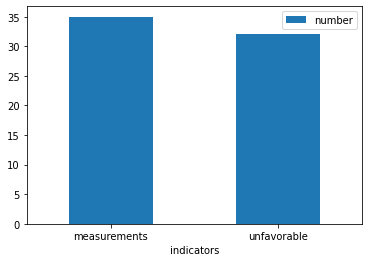

In [33]:
# Summary

import math

measurements = 0
for m in df_rate_comparison['% Variation (total prices)']:
  if not math.isnan(m):
    measurements += 1
print(f'Total measurements: {measurements}')

unfavorable = 0
for adv in df_rate_comparison['% Variation (total prices)']:
    if adv >= 1:
        unfavorable += 1
percent_unfavorable = (unfavorable / measurements) * 100
print(f'Percentage of unfavorable measurements: {percent_unfavorable:.2f}%')

df_summary = pd.DataFrame({'indicators':['measurements', 'unfavorable'], 'number':[measurements, unfavorable]})
df_summary.plot.bar(x='indicators', y='number', rot=0)

In [34]:
# Highlights

def highlight(s):
    color_red = 'red'
    color_yellow = 'yellow'
    color_green = 'green'
    if s >= 1:
      return 'background-color: %s' % color_red
    elif s < 1 and s > -1:
      return 'background-color: %s' % color_yellow
    elif s <= -1:
      return 'background-color: %s' % color_green

report = df_rate_comparison.style.applymap(highlight, subset=pd.IndexSlice[:, ['% Variation (total prices)']])

In [35]:
# Dataframe to XLSX

writer = pd.ExcelWriter('Rate-parity-report-123milhas-Decolar-{}.xlsx'.format(name_destination))
report.to_excel(writer, f'IN_{checkin}-OUT_{checkout}', index=False)
writer.save()

In [36]:
# Download XLSX

from google.colab import files

files.download('Rate-parity-report-123milhas-Decolar-{}.xlsx'.format(name_destination))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>